<a href="https://colab.research.google.com/github/tantien-hmtt/TH/blob/main/lstm_sqli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline
from keras.preprocessing.text import Tokenizer
import tensorflow as tf
from keras.metrics import Recall

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
df= pd.read_csv("/content/drive/MyDrive/sql_data/sqli.csv", encoding='utf-16')
df.head()

,Sentence,Label
0,a,1
1,a',1
2,a' --,1
3,a' or 1 = 1; --,1
4,@,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4200 entries, 0 to 4199
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  4187 non-null   object
 1   Label     4200 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 65.8+ KB


In [ ]:

df.dropna(inplace=True)#to drop out nan values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4187 entries, 0 to 4199
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  4187 non-null   object
 1   Label     4187 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 227.2+ KB


In [ ]:
df.head()

,Sentence,Label
0,a,1
1,a',1
2,a' --,1
3,a' or 1 = 1; --,1
4,@,1


<Axes: ylabel='count'>

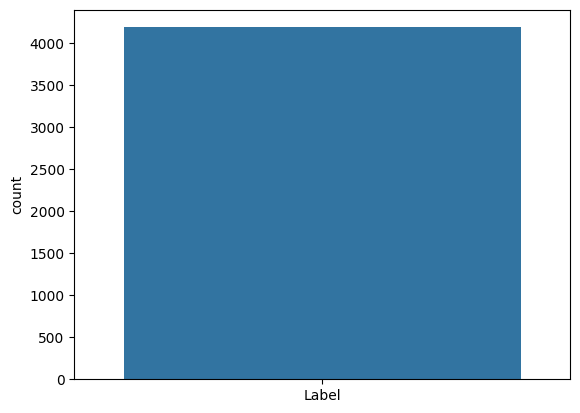

In [ ]:
sns.countplot(df)

Text(0.5, 1.0, 'Number of malicious and benign queries')

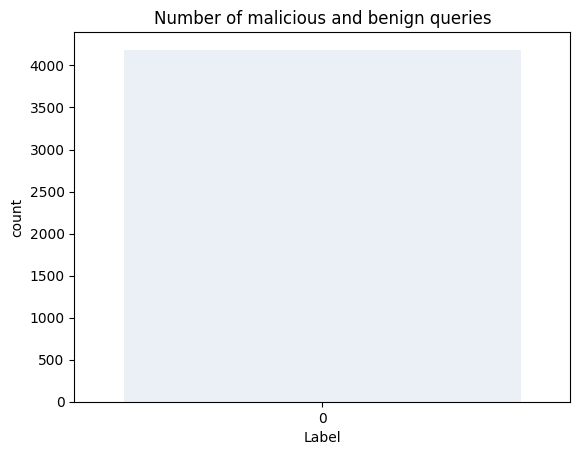

In [ ]:
sns.countplot(df.Label, alpha = 0.1)
plt.xlabel('Label')
plt.title('Number of malicious and benign queries')

seaborn

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4187 entries, 0 to 4199
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  4187 non-null   object
 1   Label     4187 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 98.1+ KB


In [ ]:
X = df['Sentence']

In [ ]:
y = df['Label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

process data

In [ ]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [ ]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model


In [ ]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=[Recall()])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 150)]             0         
                                                                 
 embedding (Embedding)       (None, 150, 50)           50000     
                                                                 
 lstm (LSTM)                 (None, 64)                29440     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257   

In [ ]:
model.fit(sequences_matrix,y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Epoch 1/10
21/21 [==============================] - 9s 289ms/step - loss: 0.5735 - recall: 0.0576 - val_loss: 0.4940 - val_recall: 0.1006
Epoch 2/10
21/21 [==============================] - 8s 412ms/step - loss: 0.3727 - recall: 0.5014 - val_loss: 0.2849 - val_recall: 0.5419
Epoch 3/10
21/21 [==============================] - 5s 250ms/step - loss: 0.1652 - recall: 0.8026 - val_loss: 0.1195 - val_recall: 0.8268
Epoch 4/10
21/21 [==============================] - 7s 327ms/step - loss: 0.0944 - recall: 0.8804 - val_loss: 0.0840 - val_recall: 0.8436
Epoch 5/10
21/21 [==============================] - 6s 295ms/step - loss: 0.0637 - recall: 0.9280 - val_loss: 0.0672 - val_recall: 0.9832
Epoch 6/10
21/21 [==============================] - 6s 265ms/step - loss: 0.0524 - recall: 0.9524 - val_loss: 0.0605 - val_recall: 0.9832
Epoch 7/10
21/21 [==============================] - 8s 400ms/step - loss: 0.0431 - recall: 0.9625 - val_loss: 0.0577 - val_recall: 0.9832
Epoch 8/10
21/21 [================

In [ ]:
X_test_sequences = tok.texts_to_sequences(X_test)
X_test_sequences_matrix = sequence.pad_sequences(X_test_sequences,maxlen=max_len)

evaluate

In [ ]:
recall = model.evaluate(X_test_sequences_matrix,y_test)

27/27 [==============================] - 1s 40ms/step - loss: 0.0447 - recall: 0.9724


In [ ]:
print('Test set\n Loss: {:0.3f}\n Recall: {:0.3f}'.format(recall[0],recall[1]))

Test set
 Loss: 0.045
 Recall: 0.972


predict y

In [ ]:
y_pred=model.predict(X_test_sequences_matrix)

27/27 [==============================] - 2s 41ms/step


In [ ]:
print(y_pred)

[[9.99027193e-01]
 [3.95930238e-06]
 [6.76360011e-01]
 [9.98018026e-01]
 [6.76360011e-01]
 [9.92690265e-01]
 [9.99894977e-01]
 [3.80158564e-03]
 [1.36426002e-06]
 [9.75136757e-01]
 [2.64921482e-07]
 [5.98897605e-05]
 [9.45044449e-04]
 [9.97040927e-01]
 [5.38746135e-05]
 [2.80170866e-06]
 [6.70841634e-01]
 [2.31587095e-03]
 [9.77203906e-01]
 [6.76360011e-01]
 [3.49531736e-04]
 [2.95642123e-04]
 [9.99617159e-01]
 [9.99813259e-01]
 [2.53854007e-01]
 [9.93739545e-01]
 [3.04548830e-05]
 [6.96049710e-07]
 [1.17871084e-03]
 [8.97797122e-07]
 [2.00402828e-05]
 [9.86659884e-01]
 [3.06118466e-07]
 [9.99894977e-01]
 [6.68908237e-04]
 [9.64067294e-06]
 [1.88951926e-05]
 [1.20686571e-04]
 [1.99893002e-05]
 [2.67466930e-06]
 [3.51005374e-03]
 [1.44459761e-03]
 [6.59997924e-04]
 [5.74062462e-04]
 [1.39915035e-04]
 [5.26064068e-05]
 [4.12182162e-05]
 [2.27389251e-07]
 [2.18543119e-05]
 [5.18305569e-06]
 [6.93627771e-06]
 [2.92258792e-05]
 [9.99918044e-01]
 [2.57704942e-05]
 [6.19265347e-06]
 [9.998949

In [ ]:
for i in range(len(y_pred)):
    if y_pred[i]>0.5:
        y_pred[i]=1
    elif y_pred[i]<=0.5:
        y_pred[i]=0

In [ ]:
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


In [ ]:
confusion_matrix(y_test, y_pred)

array([[575,   9],
       [  7, 247]])

In [ ]:
accuracy=accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
print(f" Accuracy : {accuracy} \n Precision : {precision} \n Recall : {recall}")

 Accuracy : 0.9809069212410502 
 Precision : 0.96484375 
 Recall : 0.9724409448818898


In [ ]:
from keras.models import load_model
from pathlib import Path


# Save neural network's trained weights
model.save_weights("/content/drive/MyDrive/model_lstm/lstm_weights.h5")
#print('done')

# or you can save the full model via:
model.save('/content/drive/MyDrive/model_lstm/lstm_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#load model and test

In [ ]:
import tensorflow
!pip install --upgrade tensorflow

AttributeError: ignored

In [ ]:



model_path = '/content/drive/MyDrive/model_lstm/lstm_model.h5'
weights_path = '/content/drive/MyDrive/model_lstm/lstm_weights.h5'

try:
    loaded_model = tf.keras.models.load_model(model_path)
    loaded_model.load_weights(weights_path)
    print("Model loaded successfully.")
except Exception as e:
    print("Error loading the model:", str(e))


AttributeError: ignored

#process data from user

In [ ]:
def clean_data(input_val):

    txts = tok.texts_to_sequences(input_val)
    input_val = sequence.pad_sequences(txts, maxlen=max_len)

    return input_val


def predict_sqli_attack():

    repeat=True

    space=''
    for i in range(20):
        space+= "-"

    print(space)
    input_val=input("Please enter some data: ")
    print(space)


    if input_val== '0':
        repeat=False

    sample_texts_list = []
    sample_texts_list.append(input_val)
    txts = tok.texts_to_sequences(sample_texts_list)
    txts = sequence.pad_sequences(txts, maxlen=max_len)

    result=loaded_model.predict(txts)
    print(result)


    print(space)


    if repeat == True:
            if result > 0.5:
                 print("ALERT! This can be SQL injection")
            elif result <= 0.5:
                 print("It seems to be a benign")

            print(space)

            predict_sqli_attack()

    elif repeat == False:
        print( " Closing ")

#implement

In [ ]:

predict_sqli_attack()


--------------------
--------------------
1/1 [==============================] - 1s 647ms/step
[[0.38426065]]
--------------------
It seems to be a benign
--------------------
--------------------
--------------------
1/1 [==============================] - 0s 29ms/step
[[0.99973774]]
--------------------
ALERT! This can be SQL injection
--------------------
--------------------
--------------------
1/1 [==============================] - 0s 27ms/step
[[0.9993827]]
--------------------
ALERT! This can be SQL injection
--------------------
--------------------
--------------------
1/1 [==============================] - 0s 31ms/step
[[0.9963028]]
--------------------
ALERT! This can be SQL injection
--------------------
--------------------
--------------------
1/1 [==============================] - 0s 27ms/step
[[0.98987275]]
--------------------
ALERT! This can be SQL injection
--------------------
--------------------
--------------------
1/1 [==============================] - 0s 30ms/s